In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
data = pd.read_csv("drive/My Drive/Colab Notebooks/My Projects/TikTok Reviews Sentiment Analysis/tiktok_reviews.csv")

In [3]:
data.head()

reviewId        userName  \
0  gp:AOqpTOHRz-11c0apHLSKHHp52FxUXsQS9Z88wP3sWc5...    MR LOL GAMER   
1  gp:AOqpTOF6mFDEkIypmyT3shDLjPHg8zB3kdns2W36ahp...     Dino Kljako   
2  gp:AOqpTOGtqU4sb8vuVo3-eB7kIXWoBn-0YCUZ1SnPRKS...  Olivia Harding   
3  gp:AOqpTOFHDm-Qa5R6jCpOGTFT2qr1_PKbCTbBNPahCEn...         Keli We   
4  gp:AOqpTOFB6Ndao8IHRpOJRmbSknwMGxHcwYzux93YyXI...    Mavis Kotoka   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AATXAJ...   
1  https://play-lh.googleusercontent.com/a-/AOh14...   
2  https://play-lh.googleusercontent.com/a/AATXAJ...   
3  https://play-lh.googleusercontent.com/a-/AOh14...   
4  https://play-lh.googleusercontent.com/a/AATXAJ...   

                                             content  score  thumbsUpCount  \
0                                               Good      5              0   
1  Awesome app! Too many people on it where it's ...      5              0   
2                                            Not bad      5              0   
3                                         It is good      2              0   
4                               Very interesting app      5              0   

  reviewCreatedVersion                   at replyContent repliedAt  
0               23.8.4  2022-04-05 23:18:30          NaN       NaN  
1                  NaN  2022-04-05 23:18:21          NaN       NaN  
2               23.9.5  2022-04-05 23:17:34          NaN       NaN  
3               22.2.5  2022-04-05 23:17:04          NaN       NaN  
4               22.1.5  2022-04-05 23:17:04          NaN       NaN

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307057 entries, 0 to 307056
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              307057 non-null  object
 1   userName              307057 non-null  object
 2   userImage             307057 non-null  object
 3   content               307053 non-null  object
 4   score                 307057 non-null  int64 
 5   thumbsUpCount         307057 non-null  int64 
 6   reviewCreatedVersion  217841 non-null  object
 7   at                    307057 non-null  object
 8   replyContent          119 non-null     object
 9   repliedAt             119 non-null     object
dtypes: int64(2), object(8)
memory usage: 23.4+ MB


In [5]:
df = data[["content","score"]]
df.head()

content  score
0                                               Good      5
1  Awesome app! Too many people on it where it's ...      5
2                                            Not bad      5
3                                         It is good      2
4                               Very interesting app      5

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307057 entries, 0 to 307056
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  307053 non-null  object
 1   score    307057 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ MB


In [7]:
df.describe(include="all")

content          score
count   307053  307057.000000
unique  189619            NaN
top       Good            NaN
freq     11452            NaN
mean       NaN       4.305966
std        NaN       1.374927
min        NaN       1.000000
25%        NaN       5.000000
50%        NaN       5.000000
75%        NaN       5.000000
max        NaN       5.000000

In [8]:
df.score.value_counts()

5    232507
1     37080
4     17985
3     11652
2      7833
Name: score, dtype: int64

In [9]:
df.isnull().sum()

content    4
score      0
dtype: int64

In [10]:
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [11]:
stopwords = set(stopwords.words("english"))

In [12]:
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopwords]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = ' '.join(text)
  return text

In [13]:
df["content"] = data["content"].apply(clean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
ratings = data["score"].value_counts()
ratings

5    232507
1     37080
4     17985
3     11652
2      7833
Name: score, dtype: int64

In [15]:
numbers = ratings.index
numbers

Int64Index([5, 1, 4, 3, 2], dtype='int64')

In [16]:
quantity = ratings.values
quantity

array([232507,  37080,  17985,  11652,   7833])

In [17]:
import plotly.express as px

In [18]:
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

In [19]:
df.content.head()

0                                                 good
1    awesom app mani peopl easier fb girl awesom gu...
2                                                  bad
3                                                 good
4                                         interest app
Name: content, dtype: object

In [20]:
text = " ".join(i for i in df.content)
text

"good awesom app mani peopl easier fb girl awesom guy well guy wear toy mask like bad good interest app love app u even make good friend cool video ☺️ plea video like suspend phine reason tiktok u got fix messdd uo good good cheeseburg hate sensori mani issu good cool great app entertain 😎 nc  🙏🙏🙏🙏pleas dear tik tok team pleas viral video make day recent updat   video stop freez cant watch  also want start  cant even watch video  start  😒 nice good nice app dear tiktok team plzz open account never make mistak sorri mistak happen nice good app good nice islam instagram realli great network tool  issu content creator mute video moorish american journalist right use sound wisdom love ameerah hadiya good nice wow tik tok like funni sometim get kinda old interest good app love much best app ever best app world make video watch anyth like app best kind quit watch youtub tik tok good definit tri love love love tiktok place think everyon check life love good  good app full fun n happi tiktok e

In [23]:
stopwords = set(STOPWORDS)
print(stopwords)

{'who', 'himself', 'because', 'ourselves', "they'll", "i'm", 'but', "we've", 'at', "won't", 'theirs', "aren't", "there's", "here's", 'off', 'while', 'whom', "hasn't", 'no', "i'd", 'only', 'few', 'was', "mustn't", 'under', 'your', "you'd", 'should', 'having', "couldn't", 'like', 'cannot', "they'd", 'very', 'ever', 'more', 'it', 'the', 'yourself', "weren't", 'on', 'then', 'themselves', 'however', 'all', 'you', 'such', 'of', 'i', 'me', 'by', 'she', 'they', "i'll", 'what', "what's", 'her', 'out', 'ought', 'does', 'if', 'myself', 'until', 'most', 'nor', "he'd", 'hers', 'k', 'these', 'itself', 'about', 'in', 'own', "we're", 'not', 'there', 'than', 'against', 'other', 'an', 'some', "you'll", "we'd", 'r', "hadn't", 'here', 'same', "why's", "we'll", "they're", 'too', 'had', "where's", 'as', 'where', 'my', "they've", "she'd", 'do', "wasn't", "he's", 'would', 'been', 'into', 'also', "haven't", "doesn't", "how's", 'are', 'doing', 'why', "let's", 'or', "shouldn't", 'over', 'both', "he'll", "i've", 

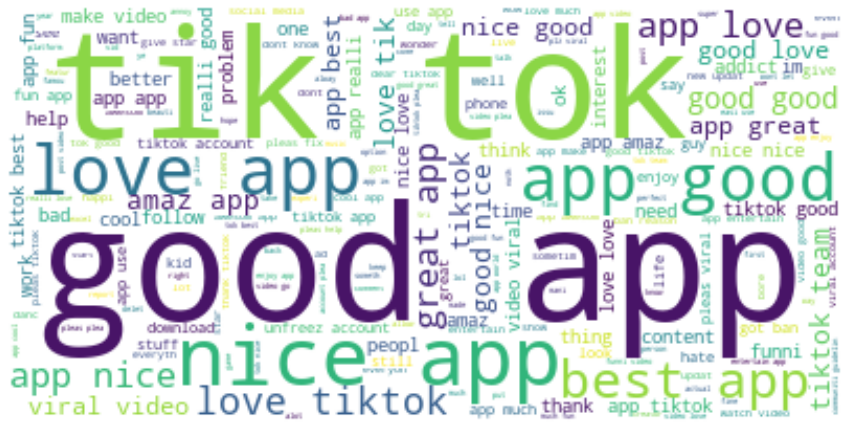

In [25]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["content"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["content"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["content"]]
df = df[["content","Positive","Negative","Neutral"]]

In [28]:
df.head()

content  Positive  Negative  \
0                                               good     1.000       0.0   
1  awesom app mani peopl easier fb girl awesom gu...     0.381       0.0   
2                                                bad     0.000       1.0   
3                                               good     1.000       0.0   
4                                       interest app     0.750       0.0   

   Neutral  
0    0.000  
1    0.619  
2    0.000  
3    0.000  
4    0.250

In [ ]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
positive = ' '.join([i for i in df["content"][df['Positive']>df['Negative']]])

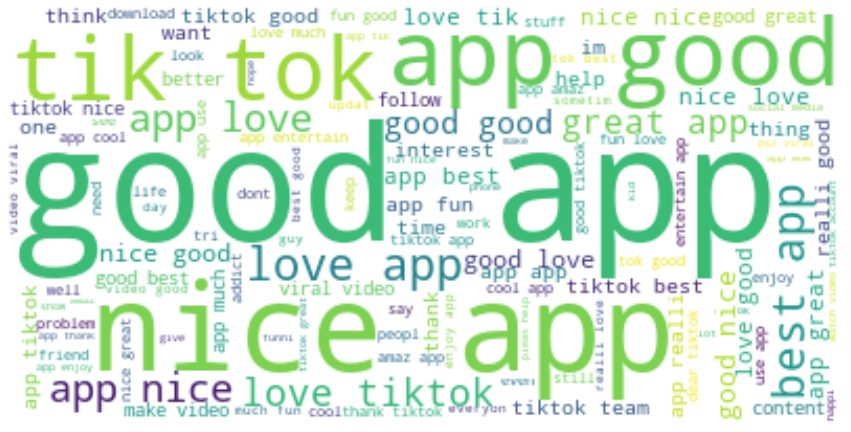

In [32]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
negative = ' '.join([i for i in df["content"][df['Negative']>df['Positive']]])

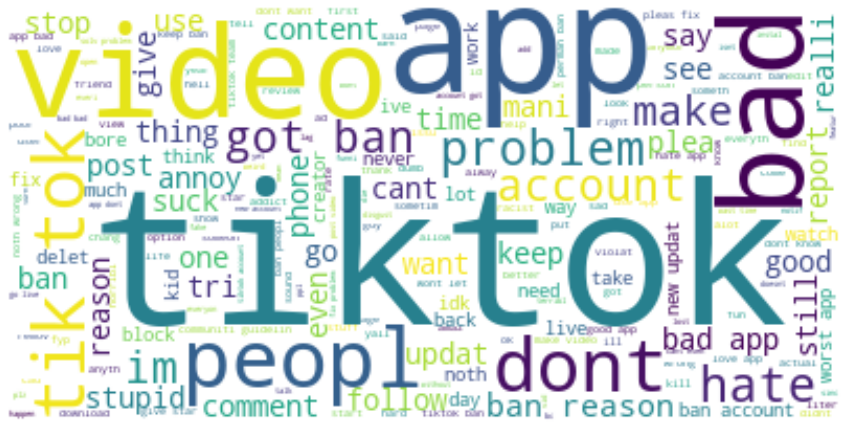

In [34]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()